# BOOM BOOM IPL 
 
Today I am going to analyse the data of IPL of 12 season which ranging from 2008 to 2019. I am very excited to analyse such an real life data set by using different library like pandas,seaborn,matplotlib,numpy which is useful to read and different visualisation of  CSV files in easy manner. I get this data set from Kaggle which is provided by the course instructor of [Data Analysis with Python: Zero to Pandas](zerotopandas.com). This data set contain to two type of CSV files one is deliveries.csv and other one is matches.csv.  Deliveries.csv file contains the information about the matches which contains location ,team,date, toss, result and many more. similarly matches.csv contains information of each matches which include score of batsman, wicket taken by bowler, total runs, dismissl kind etc.
By using the different libraries I am going to analyse  the most run scorer, most wicket taker,Most win by team, most six heater, and so many interest things ,so lets start. 

## Downloading the Dataset

We'll use the Kagle dataset for our analysis. This is a data set which contains the information of matches of 12 IPL season and Following is the link to find the raw dataset of IPL Matches & results here: https://www.kaggle.com/nowke9/ipldata
 
There are several options for getting the dataset into Jupyter:

We'll use the opendatasets helper library to download the files.


In [3]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [4]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/nowke9/ipldata' 

In [5]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adityakeshri
Your Kaggle Key: ········


100%|██████████| 1.20M/1.20M [00:00<00:00, 106MB/s]

The dataset has been downloaded and extracted.

In [95]:

import os
data_dir = 'ipldata'

In [7]:
os.listdir(data_dir)

['deliveries.csv', 'matches.csv']

Let us save and upload our work to Jovian before continuing.

In [85]:
project_name = "IPL Data analysis"

In [86]:
!pip install jovian --upgrade -q

In [87]:
import jovian

In [88]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Creating a new project "2018eeb1130/IPL Data analysis"
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/2018eeb1130/ipl-data-analysis


'https://jovian.ml/2018eeb1130/ipl-data-analysis'

## Data Preparation and Cleaning

- Here we will read the data set by using pandas.
- we will see the number of columns,rows, and the type of  information data set contain.
- we can read more than one CSV files and can merge them for better analysis.
- we can handle missing, incorrect and invalid data


In [12]:
import pandas as pd
match = pd.read_csv('ipldata/matches.csv')
match

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


Make copy of this data set so that any changing in this data set doesnot affect the original data set.

In [13]:
match_df=match.copy()

Now to gather information about data set like what it is about and the maximum,mean of different columns data type of columns etc use .info() and .describe() method.

In [14]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [15]:
match_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [16]:
match_df.columns


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [17]:
match_df.drop(columns=['umpire1','umpire2','umpire3'],inplace = True)

In [18]:
match_df.shape

(756, 15)

Lets see the list of different city where the matches held

In [19]:
match_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [20]:
len(match_df.city.unique())

33

we want to know the list of teams participated in particlar year. so we can do this by using .unique() method.

In [21]:
match_df[match_df.season==2017].team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab'],
      dtype=object)

In [22]:
match_df[match_df.season==2017].team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions'],
      dtype=object)

Get the list of different season menas the data set contains about the information of how many years?

In [23]:
match_df.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

Lets download another CSV file related to this data set

In [24]:
delivery = pd.read_csv('ipldata/deliveries.csv')
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [25]:
delivery_df = delivery.copy()

In [26]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [27]:
delivery_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [28]:
delivery_df.shape

(179078, 21)

Here we can see that there are large number of columns so lets drop the unwanted columns by using the .drop() method.

In [29]:
delivery_df.drop(columns=['bye_runs','legbye_runs','noball_runs','penalty_runs','batsman_runs','extra_runs'],inplace=True)

In [30]:
delivery_df.shape

(179078, 15)

To know the number of different batsman playing in span of 12 years of IPL season , we use the .unique() method , It will return the list of dufferent players and then use .len() method to know the number of different players.  

In [31]:
len(delivery_df.batsman.unique())

516

To merge the two CSV file we cn use the merge method but for that we need to have any columns form both file should be equal for merging. so we create new column of name "id" and replece it with column name of "match_id" in describe csv file. 

In [32]:
delivery_df['id']=delivery_df['match_id']
delivery_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,total_runs,player_dismissed,dismissal_kind,fielder,id
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,NaN,NaN,NaN,1
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,NaN,NaN,NaN,1
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,4,NaN,NaN,NaN,1
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,NaN,NaN,NaN,1
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,2,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,1,NaN,NaN,NaN,11415
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,2,NaN,NaN,NaN,11415
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,1,SR Watson,run out,KH Pandya,11415
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,2,NaN,NaN,NaN,11415


Now merge the two CSV files on the basis of  column name "id" by using the .merge() method 

In [33]:
merge = match_df.merge(delivery_df,on="id")
merge

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,ball,batsman,non_striker,bowler,is_super_over,wide_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,1,DA Warner,S Dhawan,TS Mills,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,2,DA Warner,S Dhawan,TS Mills,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,3,DA Warner,S Dhawan,TS Mills,0,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,4,DA Warner,S Dhawan,TS Mills,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,5,DA Warner,S Dhawan,TS Mills,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,2,RA Jadeja,SR Watson,SL Malinga,0,0,1,NaN,NaN,NaN
179074,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,3,SR Watson,RA Jadeja,SL Malinga,0,0,2,NaN,NaN,NaN
179075,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,4,SR Watson,RA Jadeja,SL Malinga,0,0,1,SR Watson,run out,KH Pandya
179076,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,5,SN Thakur,RA Jadeja,SL Malinga,0,0,2,NaN,NaN,NaN


In [34]:
merge_df=merge.copy()

In [35]:
merge_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'match_id', 'inning',
       'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'total_runs',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [36]:
import jovian

In [37]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "2018eeb1130/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/2018eeb1130/zerotopandas-course-project-starter


'https://jovian.ml/2018eeb1130/zerotopandas-course-project-starter'

## Exploratory Analysis and Visualization

- we will visualise the data by importing matplotlib ,numpy and seaborn.
- we will use line plot ,bar plot, histogram and pie chart.
- we can also add the xlabel and ylabel for better undersatnding
- we can also add the title and diffrent color to graph for better visulisation.


In [98]:
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**RUN CHASE COMPARISON**

we will use matplotlib library to compare the run chase in random match between two teams.
we extracted the particular columns and particular value of id and innings from merge_df dataset and then plot the line graph
between each over and total runs scored in that over.

In [172]:
inning1 = merge_df[merge_df.id==11415][['over','total_runs','inning','player_dismissed']]
inning1.columns

Index(['over', 'total_runs', 'inning', 'player_dismissed'], dtype='object')

In [180]:
inning1_df=inning1[inning1.inning==1]
wicket1_df=inning1_df
total1 = inning1_df.total_runs.sum()
inning1_df=inning1_df.groupby('over')[['total_runs']].sum()

In [207]:
inning2_df=inning1[inning1.inning==2]
wicket2_df=inning2_df
total2 = inning2_df.total_runs.sum()
inning2_df=inning2_df.groupby('over')[['total_runs']].sum()

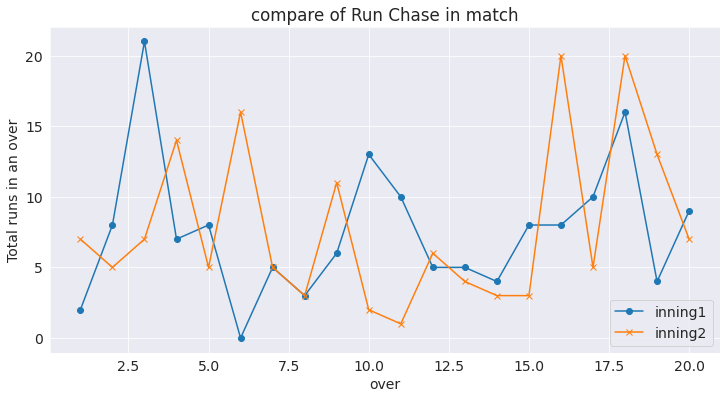

In [208]:
plt.figure(figsize=(12, 6))
plt.plot(inning1_df.total_runs,marker='o')
plt.plot(inning2_df.total_runs,marker='x')
plt.xlabel('over')
plt.ylabel('Total runs in an over')
plt.title('compare of Run Chase in match')
plt.legend(['inning1','inning2'])

In [169]:
print(total1,"  ",total2)

152    157


From above line plot we can analyse the innings of both team after each over and also in particular over.
we observe that maximum runs scored in an over in inning1 is 21 and in second inning maximum run scored is 20.
and total run scored in inning1 and inning2 are 152 and 157 respectively. so the team2 won the match. 

**WICKET FALL**

We are going to analyse the same match , but this time we will analyse the fall of wickets in range of over. This time we will analyse this by using histogram.

In [237]:
wicket1_df = wicket1_df.groupby('player_dismissed')[['over']].sum()
wicket1_df.shape

(8, 1)

In [210]:
wicket2_df = wicket2_df.groupby('player_dismissed')[['over']].sum()
wicket2_df

,over
player_dismissed,
AT Rayudu,11
DJ Bravo,19
F du Plessis,4
MS Dhoni,13
SK Raina,10
SN Thakur,20
SR Watson,20


Text(0.5, 1.0, 'Fall of wickets')

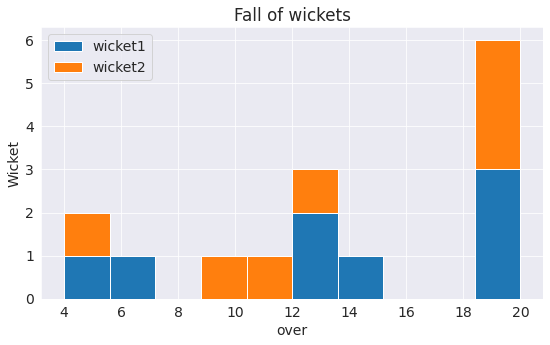

In [219]:
plt.hist([wicket1_df.over,wicket2_df.over],stacked=True)
plt.xlabel('over')
plt.ylabel('Wicket')
plt.legend(['wicket1','wicket2'])
plt.title('Fall of wickets')


Here we plot the histogram of wicket fall over an range of over for both the innings. so we stacked the one histogram over another, the bottom histogram which is in blue color represent for inning 1 and the upper histogram which is in red color reperesent for inning2. 
So from above histogram we can observe that most number of wicket fall get happen in last of two overs in both the innings and the less number of wicket fall in starting of an inning. 

**Most Six**
 
Here we will see which batsman hits the most six in IPL Season 2016 by using the visualisation of Bar Plot

<AxesSubplot:title={'center':'Most Sixes'}, xlabel='batsman', ylabel='total_six'>

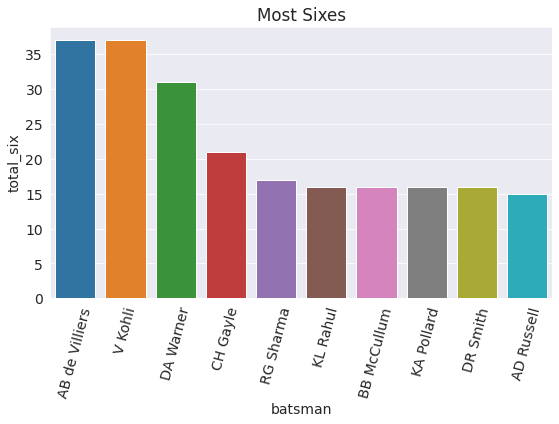

In [107]:
Sixer_df= merge_df[merge_df.season==2016][['batsman','total_runs']].copy()
Sixer_df = Sixer_df[Sixer_df.total_runs==6]
Sixer_df=Sixer_df.groupby('batsman').sum()
Sixer_df['total_six']=Sixer_df['total_runs']/6
Sixer_df=Sixer_df.sort_values('total_runs',ascending=False).head(10)
Sixer_df
plt.xticks(rotation=75)
plt.title('Most Sixes')
sns.barplot(Sixer_df.index,Sixer_df.total_six)

From the above Bar Plot we can see that AB de Villers and V Kholi is the batsman who hits the most number of sixes in IPL season 2016 and the number of sixes are 35.

**CITY RUNS** 

Now we are going to analyse by using Bar plot where we see that total scores scored in a each city then we bar plot of top 10 run scorer of cities by arranging them in decending order

In [236]:
city_df = merge_df[['city','total_runs']].copy()
city_df=city_df.groupby('city')[['total_runs']].sum()
city_df=city_df.sort_values('total_runs',ascending=False).head(10)
city_df

,total_runs
city,
Mumbai,32301
Kolkata,23857
Delhi,23156
Bangalore,20562
Hyderabad,19714
Chennai,17942
Chandigarh,14532
Jaipur,14440
Pune,11626


<AxesSubplot:title={'center':'City Score'}, xlabel='city', ylabel='total_runs'>

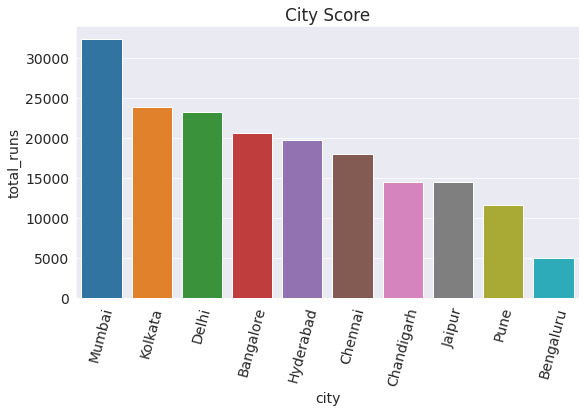

In [241]:
plt.xticks(rotation=75)
plt.title('City Score')
sns.barplot(city_df.index,city_df.total_runs)

From above bar plot we can analyse the city where the maximum run scored in span of 13 years of IPL season. So Mumbai is the city where the maximum run scored is 32301 and then Kolkata then Delhi and so on. It helps the captain to decide whether the bat first or bowl first depending on the pitch of different city if It is high scorer then bat first otherwise bowl first.   

**TEAM SCORE DISTRIBUTION**

We will analyse the total run score in particular season by different teams by using the pie chart plot. There are eight teams,in pie chart it is shown by the percentage how much that team contribute in total score of that season.

In [249]:
Team_df= merge_df[merge_df.season==2018][['batting_team','total_runs']].copy()
Team_df = Team_df.groupby('batting_team')['total_runs'].sum()
Team_df

batting_team
Chennai Super Kings            2920
Delhi Daredevils               2435
Kings XI Punjab                2295
Kolkata Knight Riders          2863
Mumbai Indians                 2505
Rajasthan Royals               2443
Royal Challengers Bangalore    2403
Sunrisers Hyderabad            2842
Name: total_runs, dtype: int64

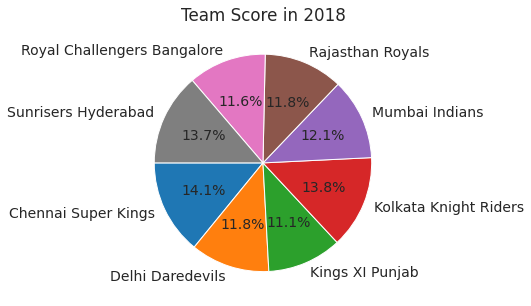

In [254]:
plt.title('Team Score in 2018')
plt.pie(Team_df, labels=Team_df.index,autopct='%1.1f%%', startangle=180)
plt.show()

By observing the above pie chart we can say that in IPL season 2018 each team almost contribute same score in that season. Kolkata Knight riders is the leading run scorer in IPL season 2018 whose contribution is about 13.8 percent,and Kings XI Punjab is least run scorer in IPLseason 2018 and it's contribution is about 11.1 percent.

In [25]:
import jovian

In [92]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "2018eeb1130/ipl-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/2018eeb1130/ipl-data-analysis


'https://jovian.ml/2018eeb1130/ipl-data-analysis'

## Asking and Answering Questions

We've already gained several insights about the performance of diffrent palyer of IPL in different season, simply by exploring individual columns of the dataset. Let's ask some specific questions, and try to answer them using data frame operations and interesting visualizations.



#### Q1: Which batsman score the most in IPL season 2018?

In [257]:
Highest_df= merge_df[merge_df.season==2018][['batsman','total_runs']].copy()
Highest_df = Highest_df.groupby('batsman')['total_runs'].sum()
Highest_df.sort_values(ascending=False).head(10)

batsman
KS Williamson    759
RR Pant          750
KL Rahul         697
AT Rayudu        628
JC Buttler       600
SR Watson        583
S Dhawan         561
V Kohli          548
KD Karthik       542
AS Yadav         536
Name: total_runs, dtype: int64

So we can see that in IPL season 2018 KS Williamson is the leading run scorer with the score of 759. RR Pant and KL Rahul is at the second and thired number position with the score of 750 and 697 respectively. so orange cap goes to KS Williamson.

#### Q2: Which team hit the most sixes in IPL season 2018?

In [104]:
Sixer_df= merge_df[merge_df.season==2018][['batting_team','total_runs']].copy()
Sixer_df = Sixer_df[Sixer_df.total_runs==6]
Sixer_df=Sixer_df.groupby('batting_team').sum()
Sixer_df['total_six']=Sixer_df['total_runs']/6
Sixer_df.sort_values('total_runs',ascending=False)

,total_runs,total_six
batting_team,,
Chennai Super Kings,870,145.0
Kolkata Knight Riders,786,131.0
Delhi Daredevils,690,115.0
Mumbai Indians,642,107.0
Royal Challengers Bangalore,630,105.0
Kings XI Punjab,624,104.0
Sunrisers Hyderabad,540,90.0
Rajasthan Royals,462,77.0


We can see that Chennai super King is the team which hit most sixes. and the number of sixes hit by team is 145.
Approach is I extract only taht row whose season value is 2018 and in which total runs score is 6. then I add the total runs of each team by using groupby() and .sum() method and then I divide it by 6, to get the total nmber of six hit.


#### Q3: Which batsman hit the most fours in IPL seson 2018?

In [38]:
Four_df= merge_df[merge_df.season==2018][['batsman','total_runs']].copy()
Four_df = Four_df[Four_df.total_runs==4]
Four_df=Four_df.groupby('batsman').sum()
Four_df['total_four']=Four_df['total_runs']/4
Four_df.sort_values('total_four',ascending=False).head(5)

,total_runs,total_four
batsman,,
RR Pant,272,68.0
KL Rahul,264,66.0
KS Williamson,256,64.0
AS Yadav,244,61.0
S Dhawan,240,60.0


So we can see that RR Pant is the batsman who hit the most fours in IPL season 2018 and he hit the 68 fours in that season following hime, KL Rahul hit 66 fours and KS Williamson hit the 64 fours. 

#### Q4: In which IPL season most DuckWorth-Lewis(DL) is taken ?

In [47]:
DL =merge_df[['dl_applied','season']].copy()
DL= DL.groupby('season').sum()
DL.sort_values('dl_applied',ascending=False)

,dl_applied
season,
2016,717
2011,541
2018,527
2009,515
2015,302
2008,298
2017,157
2014,151
2010,0


From above we can observe that In IPL season 2016 Most number of dl_decision was taken. DuckWorth-Lewis(DL) is decision technique which is used in Cricket when Umpire is not able to decide the match result or not able to decide whether he is out or not and in many other type of situation. 

#### Q5: What is the average of the batsman who score highest in  IPL season 2019?

In [67]:
Highest_df= merge_df[merge_df.season==2019][['batsman','total_runs']].copy()
Highest_df = Highest_df.groupby('batsman')[['total_runs']].sum()
Highest_df['batsman']=Highest_df.index
Highest_df.sort_values('total_runs',ascending=False).head(10)


,total_runs,batsman
batsman,,
DA Warner,762,DA Warner
KL Rahul,627,KL Rahul
Q de Kock,576,Q de Kock
AD Russell,576,AD Russell
S Dhawan,561,S Dhawan
CH Gayle,556,CH Gayle
RR Pant,528,RR Pant
SS Iyer,501,SS Iyer
J Bairstow,487,J Bairstow


In [75]:
Out_df=merge_df[merge_df.season==2019].player_dismissed.value_counts()
Out = Out_df['DA Warner']
Average= Highest_df.total_runs['DA Warner']/Out
Average

76.2

So First we need to find the batsman who score highest in IPL season 2019. Here DA Warner is the leading scorer of IPL season 2019. and then we need to find the number of times he get out in IPL season 2019 not the total number of matches he played, because in Cricket the definition of average is little bit different. Average equals to total run scored by batsman divide by the number of matches in which he get out. So the average is 76.2

Let us save and upload our work to Jovian before continuing.

In [78]:
import jovian

In [79]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "2018eeb1130/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/2018eeb1130/zerotopandas-course-project-starter


'https://jovian.ml/2018eeb1130/zerotopandas-course-project-starter'

## Inferences and Conclusion

- I did the very good analysis of data set of IPL which contains the maches of 12 season.In this I analyse this by using the different plots like Bar Plot, Line Plot, Histogram, Pie Chart  etc. 
-  I used the library of numpy and pandas. We saw, how by using pandas and numpy we can find the leading scorer of season , most sixes hits by team , most fours hit by batsman and also othe new concept of finding average of diffrent batsman.
- By data visualising concept ,First I use the line plot to compare he score of two teams in particular match, like in each over which team score the most and which less and which is more nearer to win. 
- Then I use the histogram visualisation to see the wicket fall in span over and during which over duration chance of fall of wicket is high. and Conclude during last two or three over(death over) the chances of fall of wicket is more.
- Afer this I use the visualisation of Bar plot that in which cities the highest number of score is scored and then I use the pie chart to see the contribution of each team in run scored of particular IPL season
- DA warner is the leading run scorer of IPL seasn 2019 with an average of 76.2
- In 2016 Most number of times Duckwort_ Lewis(DL) is used to take the decision
- Chennai Super King hits the most sixes in IPL season 2018 with number of sixes is 145.
- KS Williamson is the batsman whos score the highest in IPL season 2018
- RR Pant is the batsman who hits the most numer of fours in IPL season 2018.

In [83]:
import jovian

In [84]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "2018eeb1130/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/2018eeb1130/zerotopandas-course-project-starter


'https://jovian.ml/2018eeb1130/zerotopandas-course-project-starter'

## References and Future Work
We analyse the IPL dataset of IPL season of span of 12 years. we can combine this dataset with the upcoming IPL season and to keep the record of batsman and bowler.
- we can do the same analysis for one day matches and Teat match dataset or worldcup data set, and by using the similar kind of libraries and data visulistaion libraries.
- By keep in mind the importance of World cup Match these IPL data set analysis are very useful , because how the player are performing in IPL season , then those player will get higher chances of playing in Worldcup match. 
- we can compare the performance of IPL match tournament with worldcup maatch tournament.

References

- Kaggle: https://www.kaggle.com/nowke9/ipldata
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- opendatasets Python library: https://github.com/JovianML/opendatasets


In [89]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
